# Optimizacion de Cobranza Domiciliada

## Bancos Emisoras y Horarios

### **Banamex**
| **Servicio**                 | **Costo (por registro enviado)** | **Tipo de Canal**  | **Horario Límite Envío** | **Tiempo de Respuesta** |
|:----------------------------:|:--------------------------------:|:------------------:|:------------------------:|:-----------------------:|
| Cheques                      | $1.75                            | Banca Tradicional  | 08:00 - 15:00            | Mismo día               |
| Tarjetas                     | $1.75                            | Banca Tradicional  | 08:00 - 15:00            | Mismo día               |
| Interbancario                | $1.75                            | Banca (Interbanca) | 19:00 - 20:00            | Día Siguiente           |
| Cheques (Host to Host)       | $1.75                            | H2H Tradicional    | 09:00 - 16:00            | Mismo día               |
| Tarjetas (Host to Host)      | $1.75                            | H2H Tradicional    | 09:00 - 16:00            | Mismo día               |
| Interbancario (Host to Host) | $1.75                            | H2H (Interbanca)   | 19:00 - 20:00            | Día Siguiente           |


### **BBVA**

| **Servicio**  | **Costo (por registro exitoso)** | **Tipo de Canal** | **Horario Límite Envío** | **Tiempo de Respuesta** | **Notas Adicionales**          |
|:-------------:|:--------------------------------:|:-----------------:|:------------------------:|:-----------------------:|:------------------------------:|
| Tradicional   | $1.60 (Mismo Banco)              | Banca / H2H       | 08:00 - 17:00            | Día Siguiente           |                                |
| Parcial       | $1.60 (Mismo Banco)              | Banca / H2H       | 08:00 - 17:00            | 30 minutos              | Monitorea la cuenta por 6 días |
| Matutino      | $2.50 (Mismo Banco)              | Banca / H2H       | 04:00 - 07:00            | Mismo Día               |                                |
| En Línea      | $8.00 (Mismo Banco)              | Banca / H2H       | 08:00 - 18:00            | 30 minutos              |                                |
| Interbancario | $3.00                            | Banca / H2H       | 18:00 - 19:00            | Día Siguiente (STP)     |                                |


### **Santander**

| **Servicio**                       | **Costo Aceptado** | **Costo Devueltas** | **Tipo de Canal** | **Horario Límite Envío** | **Tiempo de Respuesta** | **Notas/Monitoreo**  |
|:----------------------------------:|:------------------:|:-------------------:|:-----------------:|:------------------------:|:-----------------------:|:--------------------:|
| Mismas Cuentas (Tradicional Buzón) | $1.50              | $1.42               | Banca             | 08:00 - 17:00            | Día Siguiente           | Monitorea por 7 días |
| Reintentos (Tradicional Buzón)     | $1.50              | $1.42               | Banca             | 08:00 - 17:00            | Día Siguiente           | Monitorea por 7 días |
| Interbancario (Buzón)              | $3.18              | $3.18               | Banca             | 18:00 - 19:00            | Día Siguiente           |                      |
| Mismas Cuentas (En Línea H2H)      | $1.50              | $1.42               | H2H               | 08:00 - 18:00            | 30 minutos              |                      |
| Interbancario (H2H)                | $3.18              | $3.18               | H2H               | 18:00 - 19:00            | Día Siguiente           |                      |


### **Banorte**

| **Servicio**        | **Modalidad** | **Costo (por registro enviado)** | **Tipo de Canal** | **Horario Límite Envío** | **Tiempo de Respuesta** | **Monitoreo**                             |
|:-------------------:|:-------------:|:--------------------------------:|:-----------------:|:------------------------:|:-----------------------:|:-----------------------------------------:|
| Mismas Cuentas      | En Línea      | $2.50                            | Banca / H2H       | 08:00 - 18:00            | 30 minutos              | No                                        |
| Interbancario       | En Línea      | $4.50                            | Banca / H2H       | 08:00 - 18:00            | 30 minutos              | No                                        |
| Mismas Cuentas      | Tradicional   | $2.50                            | Banca / H2H       | 08:00 - 17:00            | Día Siguiente           | Sí, por 8 días                            |
| Interbancario       | Tradicional   | $4.50                            | Banca / H2H       | 08:00 - 17:00            | Día Siguiente           | Sí, por 8 días                            |
| Cobro Especializado | Monitoreo     | $20.00                           | (No especificado) | (No especificado)        | (No especificado)       | Sí (implícito por el nombre del servicio) |


## Codigo

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('df_2021_LIMPIO.csv', low_memory=False, dtype = {0:str, 1:str, 2:str, 3:str, 8:str, 13:str, 14:str})

In [3]:
df.head()

,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,fechaEnvioCobro,pagare,capital,fechaAperturaCredito,idBancoStr,idRespuestaBancoStr
0,101188,599055,27240538,2,1765.53,1765.53,0.0,NaN,04,07/10/2022,183615.12,70000.00,2021-08-13,NaN,Cuenta Insuficiencia Fondos
1,100551,579674,27163668,21,506.38,506.38,0.0,NaN,DD00031,29/09/2022,48612.48,18204.19,2021-02-09,NaN,Cuenta con Insuficiencia de Fondos
2,100551,581020,27163709,21,4899.99,4899.99,0.0,NaN,DD00031,29/09/2022,470399.04,176153.00,2021-02-23,NaN,Cuenta con Insuficiencia de Fondos
3,100551,581980,27163662,127,444.82,444.82,0.0,NaN,DD00031,29/09/2022,16013.52,10000.00,2021-03-06,NaN,Cuenta con Insuficiencia de Fondos
4,100551,582409,27163723,21,847.85,847.85,0.0,NaN,DD00031,29/09/2022,81393.60,30480.00,2021-03-11,NaN,Cuenta con Insuficiencia de Fondos


In [4]:
df.drop(columns = ['idBancoStr'], inplace = True)

In [5]:
# banorte

data_banorte = {
  "Servicio": ["Mismas Cuentas", "Interbancario", "Mismas Cuentas", "Interbancario", "Cobro Especializado"],
  "Modalidad": ["En Línea", "En Línea", "Tradicional", "Tradicional", "Monitoreo"],
  "Costo (por registro enviado)": ["$2.50", "$4.50", "$2.50", "$4.50", "$20.00"],
  "Tipo de Canal": ["Banca / H2H", "Banca / H2H", "Banca / H2H", "Banca / H2H", "(No especificado)"],
  "Horario Límite Envío": ["08:00 - 18:00", "08:00 - 18:00", "08:00 - 17:00", "08:00 - 17:00", "(No especificado)"],
  "Tiempo de Respuesta": ["30 minutos", "30 minutos", "Día Siguiente", "Día Siguiente", "(No especificado)"],
  "Monitoreo": ["No", "No", "Sí, por 8 días", "Sí, por 8 días", "Sí (implícito por el nombre del servicio)"]
}


data_santander = {
  "Servicio": ["Mismas Cuentas (Tradicional Buzón)", "Reintentos (Tradicional Buzón)", "Interbancario (Buzón)", "Mismas Cuentas (En Línea H2H)", "Interbancario (H2H)"],
  "Costo Aceptado": ["$1.50", "$1.50", "$3.18", "$1.50", "$3.18"],
  "Costo Devueltas": ["$1.42", "$1.42", "$3.18", "$1.42", "$3.18"],
  "Tipo de Canal": ["Banca", "Banca", "Banca", "H2H", "H2H"],
  "Horario Límite Envío": ["08:00 - 17:00", "08:00 - 17:00", "18:00 - 19:00", "08:00 - 18:00", "18:00 - 19:00"],
  "Tiempo de Respuesta": ["Día Siguiente", "Día Siguiente", "Día Siguiente", "30 minutos", "Día Siguiente"],
  "Notas/Monitoreo": ["Monitorea por 7 días", "Monitorea por 7 días", "", "", ""]
}


data_bbva = {
  "Servicio": ["Tradicional", "Parcial", "Matutino", "En Línea", "Interbancario"],
  "Costo (por registro exitoso)": ["$1.60 (Mismo Banco)", "$1.60 (Mismo Banco)", "$2.50 (Mismo Banco)", "$8.00 (Mismo Banco)", "$3.00"],
  "Tipo de Canal": ["Banca / H2H", "Banca / H2H", "Banca / H2H", "Banca / H2H", "Banca / H2H"],
  "Horario Límite Envío": ["08:00 - 17:00", "08:00 - 17:00", "04:00 - 07:00", "08:00 - 18:00", "18:00 - 19:00"],
  "Tiempo de Respuesta": ["Día Siguiente", "30 minutos", "Mismo Día", "30 minutos", "Día Siguiente (STP)"],
  "Notas Adicionales": ["", "Monitorea la cuenta por 6 días", "", "", ""]
}

data_banamex = {
  "Servicio": ["Cheques", "Tarjetas", "Interbancario", "Cheques (Host to Host)", "Tarjetas (Host to Host)", "Interbancario (Host to Host)"],
  "Costo (por registro enviado)": ["$1.75", "$1.75", "$1.75", "$1.75", "$1.75", "$1.75"],
  "Tipo de Canal": ["Banca Tradicional", "Banca Tradicional", "Banca (Interbanca)", "H2H Tradicional", "H2H Tradicional", "H2H (Interbanca)"],
  "Horario Límite Envío": ["08:00 - 15:00", "08:00 - 15:00", "19:00 - 20:00", "09:00 - 16:00", "09:00 - 16:00", "19:00 - 20:00"],
  "Tiempo de Respuesta": ["Mismo día", "Mismo día", "Día Siguiente", "Mismo día", "Mismo día", "Día Siguiente"]
}

banamex = pd.DataFrame(data_banamex)
bbva = pd.DataFrame(data_bbva)
banorte = pd.DataFrame(data_banorte)
santander = pd.DataFrame(data_santander)

In [6]:
# Cargar los archivos CSV de catalogo
cat_banco = pd.read_csv('CatBanco.csv', dtype=str)
cat_emisora = pd.read_csv('CatEmisora(in).csv', dtype=str)
cat_respuesta_bancos = pd.read_csv('CatRespuestaBancos.csv', dtype=str)
lista_cobro = pd.read_csv('ListaCobro.csv', dtype=str)
lista_cobro_emisora = pd.read_csv('ListaCobroEmisora.csv', dtype=str)

In [7]:
print("Informacion de df:")
df.info()
print("\nPrimeras filas de df:")
df.head(3)

Informacion de df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6823855 entries, 0 to 6823854
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   idListaCobro          object 
 1   idCredito             object 
 2   consecutivoCobro      object 
 3   idBanco               object 
 4   montoExigible         float64
 5   montoCobrar           float64
 6   montoCobrado          float64
 7   fechaCobroBanco       object 
 8   idRespuestaBanco      object 
 9   fechaEnvioCobro       object 
 10  pagare                float64
 11  capital               float64
 12  fechaAperturaCredito  object 
 13  idRespuestaBancoStr   object 
dtypes: float64(5), object(9)
memory usage: 728.9+ MB

Primeras filas de df:


,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,fechaEnvioCobro,pagare,capital,fechaAperturaCredito,idRespuestaBancoStr
0,101188,599055,27240538,2,1765.53,1765.53,0.0,NaN,04,07/10/2022,183615.12,70000.00,2021-08-13,Cuenta Insuficiencia Fondos
1,100551,579674,27163668,21,506.38,506.38,0.0,NaN,DD00031,29/09/2022,48612.48,18204.19,2021-02-09,Cuenta con Insuficiencia de Fondos
2,100551,581020,27163709,21,4899.99,4899.99,0.0,NaN,DD00031,29/09/2022,470399.04,176153.00,2021-02-23,Cuenta con Insuficiencia de Fondos


In [8]:
print("\nInformacion de cat_banco:")
cat_banco.info()
print("\nPrimeras filas de cat_banco:")
cat_banco.head()


Informacion de cat_banco:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   IdBanco  60 non-null     object
 1   Nombre   60 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB

Primeras filas de cat_banco:


,IdBanco,Nombre
0,1,BANCO DE MEXICO (BANXICO)
1,101,BANCA CREMI
2,102,ABN AMRO BANK MEXICO
3,103,AMERICAN EXPRESS
4,106,BANK OF AMERICA


In [9]:
print("\nInformacion de cat_emisora:")
cat_emisora.info()
print("\nPrimeras filas de cat_emisora:")
cat_emisora.head()


Informacion de cat_emisora:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   idEmisora  57 non-null     object
 1   Nombre     57 non-null     object
 2   IdBanco    57 non-null     object
 3   Emisora    57 non-null     object
 4   TipoEnvio  57 non-null     object
dtypes: object(5)
memory usage: 2.4+ KB

Primeras filas de cat_emisora:


,idEmisora,Nombre,IdBanco,Emisora,TipoEnvio
0,1,BANAMEX CLABE TRADICIONAL,2,NoAplica,TRADICIONAL
1,2,BANAMEX CUENTA,2,NoAplica,CUENTA
2,3,BANAMEX TARJETA,2,NoAplica,TARJETA
3,4,BANAMEX INTERBANCARIO,2,NoAplica,INTERBANCARIO
4,5,BANAMEX TRADICIONAL REINTENTO,2,NoAplica,TRADICIONAL


In [10]:
print("\nInformacion de cat_respuesta_bancos:")
cat_respuesta_bancos.info()
print("\nPrimeras filas de cat_respuesta_bancos:")
cat_respuesta_bancos.head()


Informacion de cat_respuesta_bancos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   IdRespuestaBanco  105 non-null    object
 1   Descripcion       105 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB

Primeras filas de cat_respuesta_bancos:


,IdRespuestaBanco,Descripcion
0,00,Domiciliacion Exitosa
1,01,Cuenta Inexistente
2,02,Cuenta Bloqueada
3,03,Cuenta Cancelada
4,04,Cuenta Insuficiencia Fondos


In [11]:
print("\nInformacion de lista_cobro:")
lista_cobro.info()
print("\nPrimeras filas de lista_cobro:")
lista_cobro.head()


Informacion de lista_cobro:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29827 entries, 0 to 29826
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   idListaCobro        29827 non-null  object
 1   fechaCreacionLista  29827 non-null  object
 2   idBanco             29827 non-null  object
 3   fechaEnvioCobro     29827 non-null  object
dtypes: object(4)
memory usage: 932.2+ KB

Primeras filas de lista_cobro:


,idListaCobro,fechaCreacionLista,idBanco,fechaEnvioCobro
0,79678,04/01/2022 11:16AM,12,04/01/2022
1,79746,04/01/2022 6:36PM,12,04/01/2022
2,80111,11/01/2022 2:51PM,12,11/01/2022
3,80314,13/01/2022 11:44AM,12,13/01/2022
4,80507,14/01/2022 6:09PM,12,14/01/2022


In [12]:
print("\nInformacion de lista_cobro_emisora:")
lista_cobro_emisora.info()
print("\nPrimeras filas de lista_cobro_emisora:")
lista_cobro_emisora.head()


Informacion de lista_cobro_emisora:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29827 entries, 0 to 29826
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   idListaCobro  29827 non-null  object
 1   idEmisora     29827 non-null  object
dtypes: object(2)
memory usage: 466.2+ KB

Primeras filas de lista_cobro_emisora:


,idListaCobro,idEmisora
0,79678,20
1,80111,20
2,80584,20
3,80941,19
4,81214,20


In [13]:
# 1. Unir df con cat_banco (para obtener el nombre del banco del cliente)
df_completo = pd.merge(df, cat_banco, left_on='idBanco', right_on='IdBanco', how='left')
df_completo.rename(columns={'Nombre': 'nombre_banco_cliente'}, inplace=True)
df_completo.drop(columns=['IdBanco'], inplace=True, errors='ignore') # Eliminar la clave duplicada de cat_banco

# 2. Unir con cat_respuesta_bancos (para obtener la descripcion estandar de la respuesta)
df_completo = pd.merge(df_completo, cat_respuesta_bancos, left_on='idRespuestaBanco', right_on='IdRespuestaBanco', how='left')
df_completo.rename(columns={'Descripcion': 'descripcion_respuesta_banco_cat'}, inplace=True)
df_completo.drop(columns=['IdRespuestaBanco'], inplace=True, errors='ignore')

# 3. Unir con lista_cobro (para obtener detalles de la lista de cobro, incluyendo el banco adquirente)
df_completo = pd.merge(df_completo, lista_cobro, on='idListaCobro', how='left', suffixes=('', '_lista'))
# 'idBanco_lista' sera el banco adquirente de la lista, 'fechaEnvioCobro_lista'
df_completo.rename(columns={'idBanco_lista': 'id_banco_adquirente_lista', 
                             'fechaEnvioCobro_lista': 'fecha_envio_cobro_lista',
                             'fechaCreacionLista': 'fecha_creacion_lista'}, inplace=True)

# 4. Unir con lista_cobro_emisora (para obtener el idEmisora)
df_completo = pd.merge(df_completo, lista_cobro_emisora, on='idListaCobro', how='left')

# 5. Unir con cat_emisora (para obtener los detalles de la emisora/servicio utilizado)
df_completo = pd.merge(df_completo, cat_emisora, on='idEmisora', how='left', suffixes=('', '_cat_emisora'))
df_completo.rename(columns={'Nombre': 'nombre_servicio_emisora',
                             'IdBanco': 'id_banco_servicio_emisora', # Banco al que pertenece el servicio/emisora
                             'Emisora': 'clave_servicio_emisora',
                             'TipoEnvio': 'tipo_envio_servicio_emisora'}, inplace=True)
df_completo.drop(columns=['idEmisora'], inplace=True, errors='ignore') # idEmisora ya esta en df_completo via lista_cobro_emisora

# Verificamos las primeras filas y la informacion del DataFrame resultante
print("Informacion de df_completo:")
df_completo.info()
print("\nPrimeras filas de df_completo:")
df_completo.head()

Informacion de df_completo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6823855 entries, 0 to 6823854
Data columns (total 23 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   idListaCobro                     object 
 1   idCredito                        object 
 2   consecutivoCobro                 object 
 3   idBanco                          object 
 4   montoExigible                    float64
 5   montoCobrar                      float64
 6   montoCobrado                     float64
 7   fechaCobroBanco                  object 
 8   idRespuestaBanco                 object 
 9   fechaEnvioCobro                  object 
 10  pagare                           float64
 11  capital                          float64
 12  fechaAperturaCredito             object 
 13  idRespuestaBancoStr              object 
 14  nombre_banco_cliente             object 
 15  descripcion_respuesta_banco_cat  object 
 16  fecha_creacion_lista      

,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,fechaEnvioCobro,...,idRespuestaBancoStr,nombre_banco_cliente,descripcion_respuesta_banco_cat,fecha_creacion_lista,id_banco_adquirente_lista,fecha_envio_cobro_lista,nombre_servicio_emisora,id_banco_servicio_emisora,clave_servicio_emisora,tipo_envio_servicio_emisora
0,101188,599055,27240538,2,1765.53,1765.53,0.0,NaN,04,07/10/2022,...,Cuenta Insuficiencia Fondos,BANAMEX,Cuenta Insuficiencia Fondos,07/10/2022 11:27AM,2,07/10/2022,Banamex Reintentos ...,2,noAplica,REINTENTO
1,100551,579674,27163668,21,506.38,506.38,0.0,NaN,DD00031,29/09/2022,...,Cuenta con Insuficiencia de Fondos,HSBC,Cuenta con Insuficiencia de Fondos,29/09/2022 2:58PM,12,29/09/2022,BBVA CUENTA MATUTINO,12,6114,MATUTINO
2,100551,581020,27163709,21,4899.99,4899.99,0.0,NaN,DD00031,29/09/2022,...,Cuenta con Insuficiencia de Fondos,HSBC,Cuenta con Insuficiencia de Fondos,29/09/2022 2:58PM,12,29/09/2022,BBVA CUENTA MATUTINO,12,6114,MATUTINO
3,100551,581980,27163662,127,444.82,444.82,0.0,NaN,DD00031,29/09/2022,...,Cuenta con Insuficiencia de Fondos,AZTECA,Cuenta con Insuficiencia de Fondos,29/09/2022 2:58PM,12,29/09/2022,BBVA CUENTA MATUTINO,12,6114,MATUTINO
4,100551,582409,27163723,21,847.85,847.85,0.0,NaN,DD00031,29/09/2022,...,Cuenta con Insuficiencia de Fondos,HSBC,Cuenta con Insuficiencia de Fondos,29/09/2022 2:58PM,12,29/09/2022,BBVA CUENTA MATUTINO,12,6114,MATUTINO


In [14]:
# Convertir columnas de fecha a datetime
date_columns = [
    'fechaCobroBanco',
    'fechaEnvioCobro',
    'fechaAperturaCredito',
    'fecha_envio_cobro_lista' # Esta suele ser solo fecha
]
for col in date_columns:
    df_completo[col] = pd.to_datetime(df_completo[col], errors='coerce', dayfirst=True) # Asumimos DD/MM/YYYY

# Para fecha_creacion_lista, que puede tener hora:
df_completo['fecha_creacion_lista'] = pd.to_datetime(df_completo['fecha_creacion_lista'], errors='coerce') # Pandas intentara inferir el formato

# Verificar los cambios
print("Informacion de df_completo despues de la conversion de fechas:")
df_completo.info()
print("\nPrimeras filas de df_completo (para ver fechas):")
df_completo[['fechaCobroBanco', 'fechaEnvioCobro', 'fechaAperturaCredito', 'fecha_creacion_lista', 'fecha_envio_cobro_lista']].head()

/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_15217/380561354.py:9: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_completo[col] = pd.to_datetime(df_completo[col], errors='coerce', dayfirst=True) # Asumimos DD/MM/YYYY


Informacion de df_completo despues de la conversion de fechas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6823855 entries, 0 to 6823854
Data columns (total 23 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   idListaCobro                     object        
 1   idCredito                        object        
 2   consecutivoCobro                 object        
 3   idBanco                          object        
 4   montoExigible                    float64       
 5   montoCobrar                      float64       
 6   montoCobrado                     float64       
 7   fechaCobroBanco                  datetime64[ns]
 8   idRespuestaBanco                 object        
 9   fechaEnvioCobro                  datetime64[ns]
 10  pagare                           float64       
 11  capital                          float64       
 12  fechaAperturaCredito             datetime64[ns]
 13  idRespuestaBancoStr     

,fechaCobroBanco,fechaEnvioCobro,fechaAperturaCredito,fecha_creacion_lista,fecha_envio_cobro_lista
0,NaT,2022-10-07,2021-08-13,2022-07-10 11:27:00,2022-10-07
1,NaT,2022-09-29,2021-02-09,NaT,2022-09-29
2,NaT,2022-09-29,2021-02-23,NaT,2022-09-29
3,NaT,2022-09-29,2021-03-06,NaT,2022-09-29
4,NaT,2022-09-29,2021-03-11,NaT,2022-09-29


In [15]:
print("Valores nulos por columna en df_completo:")
print(df_completo.isnull().sum())

Valores nulos por columna en df_completo:
idListaCobro                             0
idCredito                                0
consecutivoCobro                         0
idBanco                                  0
montoExigible                            0
montoCobrar                              0
montoCobrado                             0
fechaCobroBanco                    6504510
idRespuestaBanco                        49
fechaEnvioCobro                          0
pagare                                   0
capital                                  0
fechaAperturaCredito                     0
idRespuestaBancoStr                    657
nombre_banco_cliente                     0
descripcion_respuesta_banco_cat        771
fecha_creacion_lista               4940462
id_banco_adquirente_lista                0
fecha_envio_cobro_lista                  0
nombre_servicio_emisora               1469
id_banco_servicio_emisora             1469
clave_servicio_emisora                1469
tipo_envio_s

In [16]:
df_completo['intento_exitoso'] = df_completo['montoCobrado'] > 0
print("\nConteo de intentos exitosos vs. no exitosos (proporcion):")
print(df_completo['intento_exitoso'].value_counts(normalize=True))
print("\nConteo de intentos exitosos vs. no exitosos (absoluto):")
print(df_completo['intento_exitoso'].value_counts())


Conteo de intentos exitosos vs. no exitosos (proporcion):
intento_exitoso
False    0.953202
True     0.046798
Name: proportion, dtype: float64

Conteo de intentos exitosos vs. no exitosos (absoluto):
intento_exitoso
False    6504510
True      319345
Name: count, dtype: int64


In [17]:
# Unir para obtener el nombre del banco adquirente
df_completo = pd.merge(
    df_completo,
    cat_banco,
    left_on='id_banco_adquirente_lista',
    right_on='IdBanco',
    how='left',
    suffixes=('', '_adquirente_cat') # sufijo para la columna IdBanco de cat_banco
)
df_completo.rename(columns={'Nombre': 'nombre_banco_adquirente'}, inplace=True)

# Eliminar la columna IdBanco duplicada que vino de la union
df_completo.drop(columns=['IdBanco_adquirente_cat'], inplace=True, errors='ignore')

print("\nPrimeras filas con 'nombre_banco_adquirente':")
print(df_completo[['id_banco_adquirente_lista', 'nombre_banco_adquirente']].head())

print("\nInformacion de df_completo despues de anadir nombre_banco_adquirente:")
df_completo.info()


Primeras filas con 'nombre_banco_adquirente':
  id_banco_adquirente_lista nombre_banco_adquirente
0                         2                 BANAMEX
1                        12             BBVA MEXICO
2                        12             BBVA MEXICO
3                        12             BBVA MEXICO
4                        12             BBVA MEXICO

Informacion de df_completo despues de anadir nombre_banco_adquirente:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6823855 entries, 0 to 6823854
Data columns (total 26 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   idListaCobro                     object        
 1   idCredito                        object        
 2   consecutivoCobro                 object        
 3   idBanco                          object        
 4   montoExigible                    float64       
 5   montoCobrar                      float64       
 6   montoCobrado                

In [18]:
print("\nDistribucion de Banco del Cliente (Top 10):")
print(df_completo['nombre_banco_cliente'].value_counts(normalize=True).head(10) * 100)

print("\nDistribucion de Banco Adquirente (Credifiel) (Top 10):")
print(df_completo['nombre_banco_adquirente'].value_counts(normalize=True).head(10) * 100)

print("\nDistribucion del Nombre del Servicio/Emisora Utilizado (Top 10):")
print(df_completo['nombre_servicio_emisora'].value_counts(normalize=True).head(10) * 100)

print("\nDistribucion del Tipo de Envio del Servicio/Emisora (Top 10):")
print(df_completo['tipo_envio_servicio_emisora'].value_counts(normalize=True).head(10) * 100)

print("\nDistribucion de Descripcion de Respuesta del Banco (Catalogo) para intentos NO EXITOSOS (Top 10):")
print(df_completo[df_completo['intento_exitoso'] == False]['descripcion_respuesta_banco_cat'].value_counts(normalize=True).head(10) * 100)

print("\nDistribucion de Descripcion de Respuesta del Banco (Catalogo) para intentos EXITOSOS (Top 5):")
print(df_completo[df_completo['intento_exitoso'] == True]['descripcion_respuesta_banco_cat'].value_counts(normalize=True).head(5) * 100)


Distribucion de Banco del Cliente (Top 10):
nombre_banco_cliente
BBVA MEXICO        53.747112
BANAMEX            35.156872
SANTANDER           5.434787
BANORTE             3.892301
HSBC                1.471309
AZTECA              0.184280
AFIRME              0.044330
SCOTIABANK          0.032533
BANCOPPEL           0.013057
BANCO DEL BAJIO     0.012354
Name: proportion, dtype: float64

Distribucion de Banco Adquirente (Credifiel) (Top 10):
nombre_banco_adquirente
BBVA MEXICO    55.493588
BANAMEX        35.147391
SANTANDER       5.485111
BANORTE         3.873910
Name: proportion, dtype: float64

Distribucion del Nombre del Servicio/Emisora Utilizado (Top 10):
nombre_servicio_emisora
BBVA TRADICIONAL REINTENTO                            35.971242
BANAMEX TRADICIONAL REINTENTO                         24.010881
BBVA CLABE EN LINEA                                   15.202658
BANAMEX CLABE TRADICIONAL                              8.913084
BANORTE CLABE TRADICIONAL                           

### Feature Engineering

In [19]:
# Eliminar la columna IdBanco redundante si existe
if 'IdBanco' in df_completo.columns and df_completo['IdBanco'].equals(df_completo['id_banco_adquirente_lista']):
    print("Eliminando columna 'IdBanco' redundante.")
    df_completo.drop(columns=['IdBanco'], inplace=True)
elif 'IdBanco' in df_completo.columns:
    print("La columna 'IdBanco' existe pero no es identica a 'id_banco_adquirente_lista'. Revisar.")
else:
    print("La columna 'IdBanco' redundante no fue encontrada con ese nombre exacto.")

print("\nInformacion de df_completo despues del posible borrado:")
df_completo.info()

Eliminando columna 'IdBanco' redundante.

Informacion de df_completo despues del posible borrado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6823855 entries, 0 to 6823854
Data columns (total 25 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   idListaCobro                     object        
 1   idCredito                        object        
 2   consecutivoCobro                 object        
 3   idBanco                          object        
 4   montoExigible                    float64       
 5   montoCobrar                      float64       
 6   montoCobrado                     float64       
 7   fechaCobroBanco                  datetime64[ns]
 8   idRespuestaBanco                 object        
 9   fechaEnvioCobro                  datetime64[ns]
 10  pagare                           float64       
 11  capital                          float64       
 12  fechaAperturaCredito             datetime6

In [20]:
# Asegurar que 'intento_exitoso' sea int (0 o 1) para el calculo
df_completo['intento_exitoso_int'] = df_completo['intento_exitoso'].astype(int)

# Recalcular para asegurar el tipo correcto
df_completo['exitos_previos_credito'] = df_completo.groupby('idCredito')['intento_exitoso_int'].shift(1, fill_value=0).cumsum()
df_completo['intento_para_pago_num'] = df_completo['exitos_previos_credito'] + 1

# Convertir explicitamente a integer
df_completo['exitos_previos_credito'] = df_completo['exitos_previos_credito'].astype(int)
df_completo['intento_para_pago_num'] = df_completo['intento_para_pago_num'].astype(int)

# Eliminar la columna auxiliar
df_completo.drop(columns=['intento_exitoso_int'], inplace=True)

# Verificar los tipos y las cuentas nuevamente
print("\nInformacion de df_completo despues de corregir tipos:")
df_completo.info()

print("\nDistribucion de 'intento_para_pago_num' (despues de corregir tipo):")
print(df_completo['intento_para_pago_num'].value_counts().head(10))

print("\nNumero de intentos para el 2do pago (despues de corregir tipo):")
print(df_completo[df_completo['intento_para_pago_num'] == 2].shape[0])

print("\nNumero de intentos para el 5to pago (despues de corregir tipo):")
print(df_completo[df_completo['intento_para_pago_num'] == 5].shape[0])

print("\nPrimeras filas con tipos corregidos:")
print(df_completo[['idCredito', 'intento_exitoso', 'exitos_previos_credito', 'intento_para_pago_num']].head())


Informacion de df_completo despues de corregir tipos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6823855 entries, 0 to 6823854
Data columns (total 27 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   idListaCobro                     object        
 1   idCredito                        object        
 2   consecutivoCobro                 object        
 3   idBanco                          object        
 4   montoExigible                    float64       
 5   montoCobrar                      float64       
 6   montoCobrado                     float64       
 7   fechaCobroBanco                  datetime64[ns]
 8   idRespuestaBanco                 object        
 9   fechaEnvioCobro                  datetime64[ns]
 10  pagare                           float64       
 11  capital                          float64       
 12  fechaAperturaCredito             datetime64[ns]
 13  idRespuestaBancoStr             

In [21]:
# Caracteristicas de Fecha y Hora
df_completo['dia_semana_envio_cobro'] = df_completo['fechaEnvioCobro'].dt.dayofweek
df_completo['mes_envio_cobro'] = df_completo['fechaEnvioCobro'].dt.month
df_completo['dia_mes_envio_cobro'] = df_completo['fechaEnvioCobro'].dt.day
# df_completo['hora_creacion_lista'] = df_completo['fecha_creacion_lista'].dt.hour # Solo si es util y tiene pocos nulos

# Caracteristicas del Credito
df_completo['dias_desde_apertura_credito'] = (df_completo['fechaEnvioCobro'] - df_completo['fechaAperturaCredito']).dt.days

# Relacion Banco Cliente - Adquirente
df_completo['mismo_banco_cliente_adquirente'] = df_completo['idBanco'] == df_completo['id_banco_adquirente_lista']

# Historial de intentos (generales, no solo exitosos) para este credito antes del actual
df_completo['intentos_previos_totales_credito'] = df_completo.groupby('idCredito').cumcount()

# Verifica las nuevas columnas
print("\nPrimeras filas con nuevas caracteristicas:")
print(df_completo[['idCredito', 'fechaEnvioCobro', 'dia_semana_envio_cobro', 'mes_envio_cobro', 'dias_desde_apertura_credito', 'mismo_banco_cliente_adquirente', 'intentos_previos_totales_credito', 'exitos_previos_credito', 'intento_para_pago_num']].head())

df_completo.info()


Primeras filas con nuevas caracteristicas:
  idCredito fechaEnvioCobro  dia_semana_envio_cobro  mes_envio_cobro  \
0    599055      2022-10-07                       4               10   
1    579674      2022-09-29                       3                9   
2    581020      2022-09-29                       3                9   
3    581980      2022-09-29                       3                9   
4    582409      2022-09-29                       3                9   

   dias_desde_apertura_credito  mismo_banco_cliente_adquirente  \
0                          420                            True   
1                          597                           False   
2                          583                           False   
3                          572                           False   
4                          567                           False   

   intentos_previos_totales_credito  exitos_previos_credito  \
0                                 0                       0   


In [34]:
# Re-crear DataFrames originales de bancos (como estan en tu notebook)
data_banorte = {
  "Servicio": ["Mismas Cuentas", "Interbancario", "Mismas Cuentas", "Interbancario", "Cobro Especializado"],
  "Modalidad": ["En Línea", "En Línea", "Tradicional", "Tradicional", "Monitoreo"],
  "Costo (por registro enviado)": ["$2.50", "$4.50", "$2.50", "$4.50", "$20.00"],
  "Tipo de Canal": ["Banca / H2H", "Banca / H2H", "Banca / H2H", "Banca / H2H", "(No especificado)"],
  "Horario Límite Envío": ["08:00 - 18:00", "08:00 - 18:00", "08:00 - 17:00", "08:00 - 17:00", "(No especificado)"],
  "Tiempo de Respuesta": ["30 minutos", "30 minutos", "Día Siguiente", "Día Siguiente", "(No especificado)"],
  "Monitoreo": ["No", "No", "Sí, por 8 días", "Sí, por 8 días", "Sí (implícito por el nombre del servicio)"]
}
banorte_orig = pd.DataFrame(data_banorte)

data_santander = {
  "Servicio": ["Mismas Cuentas (Tradicional Buzón)", "Reintentos (Tradicional Buzón)", "Interbancario (Buzón)", "Mismas Cuentas (En Línea H2H)", "Interbancario (H2H)"],
  "Costo Aceptado": ["$1.50", "$1.50", "$3.18", "$1.50", "$3.18"],
  "Costo Devueltas": ["$1.42", "$1.42", "$3.18", "$1.42", "$3.18"],
  "Tipo de Canal": ["Banca", "Banca", "Banca", "H2H", "H2H"],
  "Horario Límite Envío": ["08:00 - 17:00", "08:00 - 17:00", "18:00 - 19:00", "08:00 - 18:00", "18:00 - 19:00"],
  "Tiempo de Respuesta": ["Día Siguiente", "Día Siguiente", "Día Siguiente", "30 minutos", "Día Siguiente"],
  "Notas/Monitoreo": ["Monitorea por 7 días", "Monitorea por 7 días", "", "", ""]
}
santander_orig = pd.DataFrame(data_santander)

data_bbva = {
  "Servicio": ["Tradicional", "Parcial", "Matutino", "En Línea", "Interbancario"],
  "Costo (por registro exitoso)": ["$1.60 (Mismo Banco)", "$1.60 (Mismo Banco)", "$2.50 (Mismo Banco)", "$8.00 (Mismo Banco)", "$3.00"],
  "Tipo de Canal": ["Banca / H2H", "Banca / H2H", "Banca / H2H", "Banca / H2H", "Banca / H2H"],
  "Horario Límite Envío": ["08:00 - 17:00", "08:00 - 17:00", "04:00 - 07:00", "08:00 - 18:00", "18:00 - 19:00"],
  "Tiempo de Respuesta": ["Día Siguiente", "30 minutos", "Mismo Día", "30 minutos", "Día Siguiente (STP)"],
  "Notas Adicionales": ["", "Monitorea la cuenta por 6 días", "", "", ""]
}
bbva_orig = pd.DataFrame(data_bbva)

data_banamex = {
  "Servicio": ["Cheques", "Tarjetas", "Interbancario", "Cheques (Host to Host)", "Tarjetas (Host to Host)", "Interbancario (Host to Host)"],
  "Costo (por registro enviado)": ["$1.75", "$1.75", "$1.75", "$1.75", "$1.75", "$1.75"],
  "Tipo de Canal": ["Banca Tradicional", "Banca Tradicional", "Banca (Interbanca)", "H2H Tradicional", "H2H Tradicional", "H2H (Interbanca)"],
  "Horario Límite Envío": ["08:00 - 15:00", "08:00 - 15:00", "19:00 - 20:00", "09:00 - 16:00", "09:00 - 16:00", "19:00 - 20:00"],
  "Tiempo de Respuesta": ["Mismo día", "Mismo día", "Día Siguiente", "Mismo día", "Mismo día", "Día Siguiente"]
}
banamex_orig = pd.DataFrame(data_banamex)

# Funciones de utilidad (definidas una vez)
def clean_cost(cost_str):
    if pd.isna(cost_str): return np.nan
    return float(str(cost_str).replace('$', '').replace('MXN', '').strip().split(' ')[0])

def convertir_tiempo_respuesta_a_minutos(tiempo_str):
    if pd.isna(tiempo_str) or tiempo_str == '(No especificado)': return np.nan
    tiempo_str = str(tiempo_str).lower()
    if 'mismo día' in tiempo_str: return 8 * 60 
    if 'día siguiente' in tiempo_str: return 24 * 60
    if 'minutos' in tiempo_str:
        try: return int(tiempo_str.split()[0])
        except: return np.nan
    return np.nan

def parsear_horario_limite(horario_str):
    if pd.isna(horario_str) or horario_str == '(No especificado)': return pd.NaT, pd.NaT
    try:
        inicio_str, fin_str = horario_str.split(' - ')
        horario_inicio = pd.to_datetime(inicio_str, format='%H:%M').time()
        horario_fin = pd.to_datetime(fin_str, format='%H:%M').time()
        return horario_inicio, horario_fin
    except: return pd.NaT, pd.NaT

# --- Preprocesamiento Banamex ---
banamex_proc = banamex_orig.copy()
banamex_proc['banco_adquirente_nombre'] = 'BANAMEX'
banamex_proc.rename(columns={'Servicio': 'servicio_key', 
                             'Costo (por registro enviado)': 'costo_str',
                             'Tiempo de Respuesta': 'tiempo_respuesta_str',
                             'Horario Límite Envío': 'horario_limite_str'}, inplace=True)
banamex_proc['costo_por_envio'] = banamex_proc['costo_str'].apply(clean_cost)
banamex_proc['costo_por_exito'] = np.nan
banamex_proc['costo_por_devolucion'] = np.nan
banamex_proc['tiene_monitoreo'] = False
banamex_proc['dias_monitoreo'] = 0
banamex_proc['permite_parcialidad'] = False

# --- Preprocesamiento BBVA ---
bbva_proc = bbva_orig.copy()
bbva_proc['banco_adquirente_nombre'] = 'BBVA MEXICO'
bbva_proc.rename(columns={'Servicio': 'servicio_key',
                          'Costo (por registro exitoso)': 'costo_str',
                          'Tiempo de Respuesta': 'tiempo_respuesta_str',
                          'Horario Límite Envío': 'horario_limite_str',
                          'Notas Adicionales': 'notas_adicionales_str'}, inplace=True)
bbva_proc['costo_por_exito'] = bbva_proc['costo_str'].apply(clean_cost)
bbva_proc['costo_por_envio'] = np.nan
bbva_proc['costo_por_devolucion'] = np.nan # BBVA solo cobra por exito segun tabla
bbva_proc['tiene_monitoreo'] = bbva_proc['notas_adicionales_str'].str.contains('Monitorea', case=False, na=False)
bbva_proc['dias_monitoreo'] = bbva_proc['notas_adicionales_str'].str.extract(r'(\d+)\s*días').fillna(0).astype(int)
bbva_proc['permite_parcialidad'] = bbva_proc['servicio_key'].str.contains('Parcial', case=False, na=False)

# --- Preprocesamiento Banorte ---
banorte_proc = banorte_orig.copy()
banorte_proc['banco_adquirente_nombre'] = 'BANORTE'
banorte_proc['servicio_key'] = banorte_proc['Servicio'] + " (" + banorte_proc['Modalidad'] + ")"
banorte_proc.loc[banorte_proc['Servicio'] == 'Cobro Especializado', 'servicio_key'] = 'Cobro Especializado'
banorte_proc.rename(columns={'Costo (por registro enviado)': 'costo_str',
                             'Tiempo de Respuesta': 'tiempo_respuesta_str',
                             'Horario Límite Envío': 'horario_limite_str',
                             'Monitoreo': 'monitoreo_str'}, inplace=True)
banorte_proc['costo_por_envio'] = banorte_proc['costo_str'].apply(clean_cost)
banorte_proc['costo_por_exito'] = np.nan
banorte_proc['costo_por_devolucion'] = np.nan
banorte_proc['tiene_monitoreo'] = banorte_proc['monitoreo_str'].str.contains('Sí', case=False, na=False) | (banorte_proc['servicio_key'] == 'Cobro Especializado')
banorte_proc['dias_monitoreo'] = banorte_proc['monitoreo_str'].str.extract(r'(\d+)\s*días').fillna(0).astype(int)
banorte_proc['permite_parcialidad'] = False # No se menciona

# --- Preprocesamiento Santander ---
santander_proc = santander_orig.copy()
santander_proc['banco_adquirente_nombre'] = 'SANTANDER'
santander_proc.rename(columns={'Servicio': 'servicio_key',
                               'Costo Aceptado': 'costo_aceptado_str',
                               'Costo Devueltas': 'costo_devueltas_str',
                               'Tiempo de Respuesta': 'tiempo_respuesta_str',
                               'Horario Límite Envío': 'horario_limite_str',
                               'Notas/Monitoreo': 'notas_monitoreo_str'}, inplace=True)
santander_proc['costo_por_exito'] = santander_proc['costo_aceptado_str'].apply(clean_cost)
santander_proc['costo_por_devolucion'] = santander_proc['costo_devueltas_str'].apply(clean_cost)
santander_proc['costo_por_envio'] = np.nan
santander_proc['tiene_monitoreo'] = santander_proc['notas_monitoreo_str'].str.contains('Monitorea', case=False, na=False)
santander_proc['dias_monitoreo'] = santander_proc['notas_monitoreo_str'].str.extract(r'(\d+)\s*días').fillna(0).astype(int)
santander_proc['permite_parcialidad'] = False # No se menciona

# Consolidar y procesar caracteristicas comunes
servicios_bancarios_list = []
for df_proc_iter in [banamex_proc, bbva_proc, banorte_proc, santander_proc]:
    df_iter = df_proc_iter.copy()
    df_iter['tiempo_respuesta_minutos'] = df_iter['tiempo_respuesta_str'].apply(convertir_tiempo_respuesta_a_minutos)
    parsed_horarios = df_iter['horario_limite_str'].apply(parsear_horario_limite)
    df_iter['horario_limite_inicio'] = parsed_horarios.apply(lambda x: x[0])
    df_iter['horario_limite_fin'] = parsed_horarios.apply(lambda x: x[1])
    
    cols_to_keep = [
        'banco_adquirente_nombre', 'servicio_key', 
        'costo_por_envio', 'costo_por_exito', 'costo_por_devolucion',
        'tiempo_respuesta_minutos', 'horario_limite_inicio', 'horario_limite_fin',
        'tiene_monitoreo', 'dias_monitoreo', 'permite_parcialidad',
        'Tipo de Canal' # Mantener 'Tipo de Canal'
    ]
    # Asegurar que todas las columnas existan, rellenando con NaN si es necesario
    for col in cols_to_keep:
        if col not in df_iter.columns:
            df_iter[col] = np.nan
            
    servicios_bancarios_list.append(df_iter[cols_to_keep])

servicios_bancarios_df = pd.concat(servicios_bancarios_list, ignore_index=True)

# Verificar unicidad de la clave
if not servicios_bancarios_df.set_index(['banco_adquirente_nombre', 'servicio_key']).index.is_unique:
    print("ADVERTENCIA: La clave ['banco_adquirente_nombre', 'servicio_key'] NO es unica en servicios_bancarios_df.")
    print(servicios_bancarios_df[servicios_bancarios_df.duplicated(subset=['banco_adquirente_nombre', 'servicio_key'], keep=False)])
else:
    print("Confirmado: La clave ['banco_adquirente_nombre', 'servicio_key'] es unica en servicios_bancarios_df.")


print("\nServicios Bancarios Procesados (servicios_bancarios_df):")
servicios_bancarios_df.info()
print(servicios_bancarios_df.head())
print("\nEjemplo de datos de servicios bancarios (random sample):")
print(servicios_bancarios_df[['banco_adquirente_nombre', 'servicio_key', 'tiempo_respuesta_minutos', 'costo_por_envio', 'costo_por_exito', 'tiene_monitoreo']].sample(5))

# Llenar NaNs en costos para calculos posteriores de costo esperado
# Si un servicio no tiene costo_por_envio, es 0 si se cobra por exito/devolucion.
# Si no tiene costo_por_exito o costo_por_devolucion, es 0 si se cobra por envio.
# Esto es una simplificacion; la logica de costos se aplicara al calcular el costo esperado del intento.
servicios_bancarios_df['costo_por_envio'].fillna(0, inplace=True)
servicios_bancarios_df['costo_por_exito'].fillna(0, inplace=True)
servicios_bancarios_df['costo_por_devolucion'].fillna(0, inplace=True)

Confirmado: La clave ['banco_adquirente_nombre', 'servicio_key'] es unica en servicios_bancarios_df.

Servicios Bancarios Procesados (servicios_bancarios_df):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   banco_adquirente_nombre   21 non-null     object 
 1   servicio_key              21 non-null     object 
 2   costo_por_envio           11 non-null     float64
 3   costo_por_exito           10 non-null     float64
 4   costo_por_devolucion      5 non-null      float64
 5   tiempo_respuesta_minutos  20 non-null     float64
 6   horario_limite_inicio     20 non-null     object 
 7   horario_limite_fin        20 non-null     object 
 8   tiene_monitoreo           21 non-null     bool   
 9   dias_monitoreo            21 non-null     int64  
 10  permite_parcialidad       21 non-null     bool   
 11  Tipo de Canal     

/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_15217/386769804.py:171: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  servicios_bancarios_df['costo_por_envio'].fillna(0, inplace=True)
/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_15217/386769804.py:172: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

In [35]:
# Asegurate que df_completo y servicios_bancarios_df esten disponibles como en tu notebook.
# df_completo = ... (cargado y procesado en celdas anteriores)
# servicios_bancarios_df = ... (creado por la celda 32 modificada arriba)

# Definir las listas de llaves unicas por banco para la funcion de normalizacion
# Estas se deben extraer de los `servicio_key` generados en la celda 32
# Es mejor pasarlas como argumento a la funcion o definirlas globalmente aqui si son estaticas
# Por ahora, las construiremos aqui basado en los `*_proc` (asumiendo que la celda 32 ya corrio)

# Para obtener estas listas, puedes correr esto DESPUES de la celda 32 una vez:
banamex_keys_list = banamex_proc['servicio_key'].unique().tolist()
bbva_keys_list = bbva_proc['servicio_key'].unique().tolist()
banorte_keys_list = banorte_proc['servicio_key'].unique().tolist()
santander_keys_list = santander_proc['servicio_key'].unique().tolist()
print(f"banamex_keys_list = {banamex_keys_list}")
print(f"bbva_keys_list = {bbva_keys_list}")
print(f"banorte_keys_list = {banorte_keys_list}")
print(f"santander_keys_list = {santander_keys_list}")

banamex_keys_list = ['Cheques', 'Tarjetas', 'Interbancario', 'Cheques (Host to Host)', 'Tarjetas (Host to Host)', 'Interbancario (Host to Host)']
bbva_keys_list = ['Tradicional', 'Parcial', 'Matutino', 'En Línea', 'Interbancario']
banorte_keys_list = ['Mismas Cuentas (En Línea)', 'Interbancario (En Línea)', 'Mismas Cuentas (Tradicional)', 'Interbancario (Tradicional)', 'Cobro Especializado']
santander_keys_list = ['Mismas Cuentas (Tradicional Buzón)', 'Reintentos (Tradicional Buzón)', 'Interbancario (Buzón)', 'Mismas Cuentas (En Línea H2H)', 'Interbancario (H2H)']


In [38]:
# Celda 36 Modificada
banamex_keys_list = ['Cheques', 'Tarjetas', 'Interbancario', 'Cheques (Host to Host)', 'Tarjetas (Host to Host)', 'Interbancario (Host to Host)']
bbva_keys_list = ['Tradicional', 'Parcial', 'Matutino', 'En Línea', 'Interbancario']
banorte_keys_list = ['Mismas Cuentas (En Línea)', 'Interbancario (En Línea)', 'Mismas Cuentas (Tradicional)', 'Interbancario (Tradicional)', 'Cobro Especializado']
santander_keys_list = ['Mismas Cuentas (Tradicional Buzón)', 'Reintentos (Tradicional Buzón)', 'Interbancario (Buzón)', 'Mismas Cuentas (En Línea H2H)', 'Interbancario (H2H)']


def normalizar_nombre_servicio_v2(row, bmx_k, bbv_k, bnr_k, san_k):
    nombre_banco_adq = row['nombre_banco_adquirente']
    nombre_servicio_emisora_orig = str(row['nombre_servicio_emisora'])
    nombre_servicio_upper = nombre_servicio_emisora_orig.upper()

    if pd.isna(nombre_banco_adq) or nombre_servicio_upper == 'NAN':
        return np.nan

    # BANAMEX
    if nombre_banco_adq == 'BANAMEX':
        if nombre_servicio_emisora_orig in bmx_k: return nombre_servicio_emisora_orig
        if 'EXCEPCIONES CUENTA' in nombre_servicio_upper: return 'Cheques' # Mapeo de Excepciones
        if 'EXCEPCIONES TARJETA' in nombre_servicio_upper: return 'Tarjetas' # Mapeo de Excepciones
        if 'TRADICIONAL TARJETA PERIODO ACTUAL' in nombre_servicio_upper: return 'Tarjetas'
        if 'CUENTA' in nombre_servicio_upper and not 'BBVA' in nombre_servicio_upper : return 'Cheques' # BANAMEX CUENTA
        if 'H2H' in nombre_servicio_upper or 'HOST TO HOST' in nombre_servicio_upper:
            if 'CHEQUES' in nombre_servicio_upper: return 'Cheques (Host to Host)'
            if 'TARJETAS' in nombre_servicio_upper: return 'Tarjetas (Host to Host)'
            if 'INTERBANCARIO' in nombre_servicio_upper: return 'Interbancario (Host to Host)'
        if 'CHEQUES' in nombre_servicio_upper: return 'Cheques'
        if 'TARJETAS' in nombre_servicio_upper: return 'Tarjetas'
        if 'INTERBANCARIO' in nombre_servicio_upper or 'CLABE' in nombre_servicio_upper : return 'Interbancario'
        if 'REINTENTO' in nombre_servicio_upper : return 'Cheques' 
        if 'BBVA CUENTA PARCIAL' in nombre_servicio_upper : return 'Cheques' # Asumir el servicio mas parecido de Banamex

    # BBVA MEXICO
    elif nombre_banco_adq == 'BBVA MEXICO':
        if nombre_servicio_emisora_orig in bbv_k: return nombre_servicio_emisora_orig
        if 'EN LINEA' in nombre_servicio_upper or 'EN LÍNEA' in nombre_servicio_upper : return 'En Línea'
        if 'MATUTINO' in nombre_servicio_upper: return 'Matutino'
        if 'PARCIAL' in nombre_servicio_upper: return 'Parcial'
        if 'INTERBANCARIO' in nombre_servicio_upper or 'INTERBANCARIA' in nombre_servicio_upper: return 'Interbancario'
        if 'TRADICIONAL' in nombre_servicio_upper: return 'Tradicional'
        if 'REINTENTO' in nombre_servicio_upper : return 'Tradicional' 

    # BANORTE
    elif nombre_banco_adq == 'BANORTE':
        if nombre_servicio_emisora_orig in bnr_k: return nombre_servicio_emisora_orig
        if 'EXCEPCIONES CUENTA' in nombre_servicio_upper : return 'Mismas Cuentas (Tradicional)' # Mapeo de Excepciones
        if 'COBRO ESPECIALIZADO' in nombre_servicio_upper: return 'Cobro Especializado'
        
        # Para servicios "BBVA" via BANORTE, mapear a un servicio equivalente de BANORTE
        if 'BBVA CLABE INTERBANCARIA' in nombre_servicio_upper or 'BANORTE CLABE INTERBANCARIO' in nombre_servicio_upper : return 'Interbancario (Tradicional)'
        
        modalidad = None
        if 'EN LINEA' in nombre_servicio_upper or 'EN LÍNEA' in nombre_servicio_upper: modalidad = "En Línea"
        elif 'TRADICIONAL' in nombre_servicio_upper: modalidad = "Tradicional"
        
        servicio_base = None
        if 'CUENTA' in nombre_servicio_upper: servicio_base = "Mismas Cuentas"
        elif 'CLABE' in nombre_servicio_upper or 'INTERBANCARIO' in nombre_servicio_upper : servicio_base = "Interbancario"

        if servicio_base and modalidad: return f"{servicio_base} ({modalidad})"
        if 'REINTENTO' in nombre_servicio_upper : # Asumir tradicional si es reintento
             if servicio_base: return f"{servicio_base} (Tradicional)"
             return 'Mismas Cuentas (Tradicional)' # Default para reintento Banorte


    # SANTANDER
    elif nombre_banco_adq == 'SANTANDER':
        if nombre_servicio_emisora_orig in san_k: return nombre_servicio_emisora_orig
        if 'SANTANDER CUENTA' in nombre_servicio_upper : return 'Mismas Cuentas (Tradicional Buzón)' # Mapeo directo
        if 'SANTANDER CLABE TRADICIONAL' in nombre_servicio_upper: return 'Interbancario (Buzón)' # CLABE es interbancario
        if 'EXCEPCIONES CUENTA' in nombre_servicio_upper : return 'Mismas Cuentas (Tradicional Buzón)' # Mapeo de Excepciones
        
        # Para servicios "BBVA" via SANTANDER, mapear a un servicio equivalente de SANTANDER
        if 'BBVA CLABE EN LINEA' in nombre_servicio_upper: return 'Mismas Cuentas (En Línea H2H)' # El mas parecido en linea de Santander
            
        if 'MISMAS CUENTAS' in nombre_servicio_upper and ('EN LINEA' in nombre_servicio_upper or 'H2H' in nombre_servicio_upper): return 'Mismas Cuentas (En Línea H2H)'
        if 'INTERBANCARIO' in nombre_servicio_upper and 'H2H' in nombre_servicio_upper: return 'Interbancario (H2H)'
        if 'REINTENTOS' in nombre_servicio_upper and 'TRADICIONAL BUZON' in nombre_servicio_upper: return 'Reintentos (Tradicional Buzón)'
        if 'MISMAS CUENTAS' in nombre_servicio_upper and 'TRADICIONAL BUZON' in nombre_servicio_upper: return 'Mismas Cuentas (Tradicional Buzón)'
        if 'INTERBANCARIO' in nombre_servicio_upper and ('BUZON' in nombre_servicio_upper or not 'H2H' in nombre_servicio_upper) : return 'Interbancario (Buzón)' 
        if 'REINTENTO' in nombre_servicio_upper : return 'Reintentos (Tradicional Buzón)' 
        
    return nombre_servicio_emisora_orig # Devolver original si no se mapea, para inspeccion

df_completo['servicio_key_mapeada'] = df_completo.apply(
    normalizar_nombre_servicio_v2, 
    axis=1, 
    bmx_k=banamex_keys_list, 
    bbv_k=bbva_keys_list, 
    bnr_k=banorte_keys_list, 
    san_k=santander_keys_list
)

print("\nConteo de valores para 'servicio_key_mapeada' (Top 30):")
print(df_completo['servicio_key_mapeada'].value_counts(dropna=False).head(30))
print(f"\nNumero de filas donde 'servicio_key_mapeada' es igual a 'nombre_servicio_emisora' (fallo el mapeo especifico y no es NaN):")
print(df_completo[(df_completo['servicio_key_mapeada'] == df_completo['nombre_servicio_emisora']) & (df_completo['nombre_servicio_emisora'].notna())]['servicio_key_mapeada'].nunique())
print(f"Numero de NaNs en 'servicio_key_mapeada': {df_completo['servicio_key_mapeada'].isnull().sum()}")


df_completo_final = pd.merge(
    df_completo,
    servicios_bancarios_df,
    left_on=['nombre_banco_adquirente', 'servicio_key_mapeada'],
    right_on=['banco_adquirente_nombre', 'servicio_key'],
    how='left',
    suffixes=('', '_sb') 
)

print(f"Filas en df_completo: {len(df_completo)}")
print(f"Filas en df_completo_final: {len(df_completo_final)}")

cols_a_dropear = ['servicio_key_mapeada'] 
if 'banco_adquirente_nombre_sb' in df_completo_final.columns:
    # Verificar si es identica a la original antes de dropear
    if df_completo_final['banco_adquirente_nombre'].equals(df_completo_final['banco_adquirente_nombre_sb']):
        cols_a_dropear.append('banco_adquirente_nombre_sb')
    else: # Si no son identicas, hay un problema en el merge o nombres. Investigar.
        print("ADVERTENCIA: banco_adquirente_nombre y banco_adquirente_nombre_sb no son identicas!")
if 'servicio_key_sb' in df_completo_final.columns :
    if 'servicio_key' in df_completo_final.columns and df_completo_final['servicio_key_sb'].equals(df_completo_final['servicio_key']) :
         cols_a_dropear.append('servicio_key_sb')
    elif 'servicio_key' not in df_completo_final.columns:
         df_completo_final.rename(columns={'servicio_key_sb': 'servicio_key'}, inplace=True)
    # Si 'servicio_key' ya existe y es diferente de 'servicio_key_sb', es un problema.

df_completo_final.drop(columns=cols_a_dropear, inplace=True, errors='ignore')

print("\nInformacion de df_completo_final (despues de unir detalles del servicio):")
# df_completo_final.info() # Comentado para brevedad, puedes descomentar

cols_to_check_merged = ['nombre_banco_adquirente', 'nombre_servicio_emisora', 'servicio_key', 
                 'costo_por_envio', 'costo_por_exito', 'costo_por_devolucion', 
                 'tiempo_respuesta_minutos', 'horario_limite_inicio', 'horario_limite_fin',
                 'tiene_monitoreo', 'dias_monitoreo', 'permite_parcialidad', 'Tipo de Canal']

cols_existentes_check = [col for col in cols_to_check_merged if col in df_completo_final.columns]
print("\nNulos en columnas de caracteristicas del servicio anadidas:")
print(df_completo_final[cols_existentes_check].isnull().sum())

# print("\nEjemplo de filas en df_completo_final con detalles del servicio:")
# print(df_completo_final[cols_existentes_check].sample(10))

if len(df_completo_final) != len(df_completo):
    print(f"¡ADVERTENCIA! El numero de filas cambio despues del merge.")
else:
    print(f"\nConfirmado: El numero de filas no cambio despues del merge: {len(df_completo_final)}")

# Manejo de NaNs restantes en servicio_key (post-mapeo)
# Opcion 1: Eliminar filas donde nombre_servicio_emisora era NaN originalmente
filas_antes_drop_nan_original = len(df_completo_final)
df_completo_final.dropna(subset=['nombre_servicio_emisora'], inplace=True)
filas_despues_drop_nan_original = len(df_completo_final)
print(f"Filas eliminadas por nombre_servicio_emisora NaN: {filas_antes_drop_nan_original - filas_despues_drop_nan_original}")


# Opcion 2: Para los que aun tienen servicio_key NaN pero nombre_servicio_emisora NO era NaN
# (significa que el mapeo fallo para un servicio conocido)
# Por ahora, los dejaremos y el modelo debera manejar estos NaNs (o imputaremos mas adelante)
# O podriamos eliminar estas filas si son pocas y dificiles de mapear.
aun_no_mapeados = df_completo_final[df_completo_final['servicio_key'].isnull()]
print(f"Filas restantes donde servicio_key es NaN (despues de dropear NaNs originales de nombre_servicio_emisora): {len(aun_no_mapeados)}")
if not aun_no_mapeados.empty:
    print("Ejemplos de servicios aun no mapeados (despues de drop de NaN originales):")
    print(aun_no_mapeados[['nombre_banco_adquirente', 'nombre_servicio_emisora', 'servicio_key']].drop_duplicates().head(10))

# Decision: Por ahora, si servicio_key sigue siendo NaN y no es porque nombre_servicio_emisora fuera NaN,
# vamos a rellenar las columnas de caracteristicas del servicio (costos, tiempos, etc.) con valores
# que indiquen "desconocido" o un default para evitar problemas en el modelado.
# Por ejemplo, costos podrian ser muy altos (para penalizar la eleccion) o 0/medianas si se imputan.
# Tiempos podrian ser promedio o un valor que indique desconocido.
# Esta es una decision de negocio/modelado.
# Para el ejemplo, llenaremos los numericos con 0 y booleanos con False.
cols_servicio_features = ['costo_por_envio', 'costo_por_exito', 'costo_por_devolucion', 'tiempo_respuesta_minutos', 'dias_monitoreo']
for col in cols_servicio_features:
    if col in df_completo_final.columns:
        df_completo_final[col].fillna(0, inplace=True)

cols_servicio_bool = ['tiene_monitoreo', 'permite_parcialidad']
for col in cols_servicio_bool:
    if col in df_completo_final.columns:
        df_completo_final[col].fillna(False, inplace=True)

# Para 'Tipo de Canal', 'horario_limite_inicio', 'horario_limite_fin', 'servicio_key' (si aun es NaN)
# llenarlos con 'Desconocido' u otro placeholder.
cols_servicio_obj = ['Tipo de Canal', 'horario_limite_inicio', 'horario_limite_fin', 'servicio_key']
for col in cols_servicio_obj:
    if col in df_completo_final.columns:
        df_completo_final[col].fillna('Desconocido', inplace=True)
        
print("\nNulos DESPUES de manejo basico de NaNs en caracteristicas de servicio:")
print(df_completo_final[cols_existentes_check].isnull().sum())
df_completo_final.info()


Conteo de valores para 'servicio_key_mapeada' (Top 30):
servicio_key_mapeada
Tradicional                           2664189
Cheques                               1776285
En Línea                              1050498
Interbancario                          647265
Interbancario (Tradicional)            236171
Mismas Cuentas (Tradicional Buzón)     232832
Interbancario (Buzón)                  128980
Matutino                                43285
Mismas Cuentas (Tradicional)            19071
Mismas Cuentas (En Línea H2H)           11004
Interbancario (En Línea)                 8685
Parcial                                  3142
NaN                                      1469
Mismas Cuentas (En Línea)                 423
Reintentos (Tradicional Buzón)            379
Tarjetas                                  177
Name: count, dtype: int64

Numero de filas donde 'servicio_key_mapeada' es igual a 'nombre_servicio_emisora' (fallo el mapeo especifico y no es NaN):
0
Numero de NaNs en 'servicio_key_ma

/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_15217/198641531.py:177: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_completo_final[col].fillna(0, inplace=True)
/var/folders/lv/34x2z89s3s3bys5fzpv8k45c0000gn/T/ipykernel_15217/198641531.py:182: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa


Nulos DESPUES de manejo basico de NaNs en caracteristicas de servicio:
nombre_banco_adquirente     0
nombre_servicio_emisora     0
servicio_key                0
costo_por_envio             0
costo_por_exito             0
costo_por_devolucion        0
tiempo_respuesta_minutos    0
horario_limite_inicio       0
horario_limite_fin          0
tiene_monitoreo             0
dias_monitoreo              0
permite_parcialidad         0
Tipo de Canal               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 6822386 entries, 0 to 6823854
Data columns (total 46 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   idListaCobro                      object        
 1   idCredito                         object        
 2   consecutivoCobro                  object        
 3   idBanco                           object        
 4   montoExigible                     float64       
 5   montoCobrar                       

In [39]:
servicios_no_mapeados = df_completo_final[df_completo_final['servicio_key'].isnull()]
print("Valores unicos de (nombre_banco_adquirente, nombre_servicio_emisora) que no se mapearon a un servicio_key:")
print(servicios_no_mapeados[['nombre_banco_adquirente', 'nombre_servicio_emisora']].drop_duplicates().head(30)) # Muestra los primeros 30
print(f"\nTotal de combinaciones unicas no mapeadas: {servicios_no_mapeados[['nombre_banco_adquirente', 'nombre_servicio_emisora']].drop_duplicates().shape[0]}")
print(f"Total de filas no mapeadas: {len(servicios_no_mapeados)}")

print("\nConteo de los 'nombre_servicio_emisora' mas comunes no mapeados (y su banco):")
print(servicios_no_mapeados.groupby(['nombre_banco_adquirente', 'nombre_servicio_emisora']).size().sort_values(ascending=False).head(20))

Valores unicos de (nombre_banco_adquirente, nombre_servicio_emisora) que no se mapearon a un servicio_key:
Empty DataFrame
Columns: [nombre_banco_adquirente, nombre_servicio_emisora]
Index: []

Total de combinaciones unicas no mapeadas: 0
Total de filas no mapeadas: 0

Conteo de los 'nombre_servicio_emisora' mas comunes no mapeados (y su banco):
Series([], dtype: int64)


Informacion de df_completo_final antes de la preparacion para el modelo:
<class 'pandas.core.frame.DataFrame'>
Index: 6822386 entries, 0 to 6823854
Data columns (total 46 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   idListaCobro                      object        
 1   idCredito                         object        
 2   consecutivoCobro                  object        
 3   idBanco                           object        
 4   montoExigible                     float64       
 5   montoCobrar                       float64       
 6   montoCobrado                      float64       
 7   fechaCobroBanco                   datetime64[ns]
 8   idRespuestaBanco                  object        
 9   fechaEnvioCobro                   datetime64[ns]
 10  pagare                            float64       
 11  capital                           float64       
 12  fechaAperturaCredito              datetime64[ns]
 13  idRe

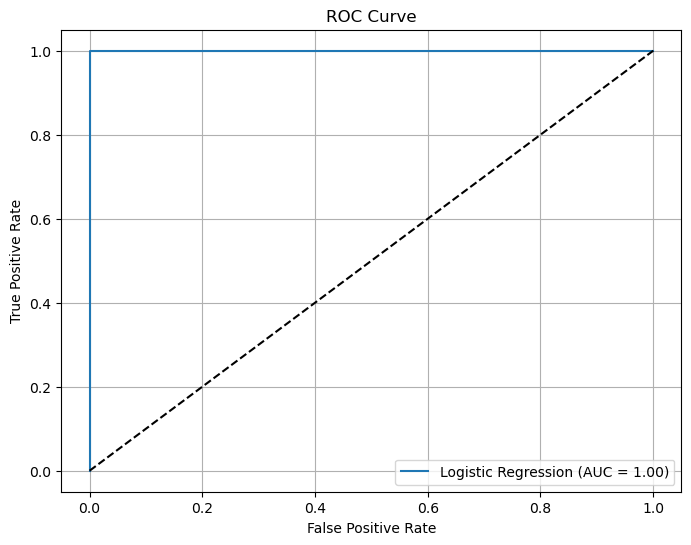

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


print("Informacion de df_completo_final antes de la preparacion para el modelo:")
if 'df_completo_final' in globals():
    df_completo_final.info()
    print(f"Numero de filas: {len(df_completo_final)}")
    # Verificar nulos en columnas clave que se usaran
    cols_to_check_nans = ['montoCobrar', 'nombre_banco_cliente', 'nombre_banco_adquirente', 
                           'dia_semana_envio_cobro', 'mes_envio_cobro', 'dias_desde_apertura_credito',
                           'exitos_previos_credito', 'intento_para_pago_num', 'mismo_banco_cliente_adquirente',
                           'intentos_previos_totales_credito', 'costo_por_envio', 'tiempo_respuesta_minutos',
                           'tiene_monitoreo', 'permite_parcialidad', 'Tipo de Canal', 'servicio_key', 'intento_exitoso']
    cols_existentes_check = [col for col in cols_to_check_nans if col in df_completo_final.columns]
    print("\\nNulos en columnas seleccionadas antes de la preparacion:")
    print(df_completo_final[cols_existentes_check].isnull().sum())
else:
    print("df_completo_final no esta definido. Por favor, ejecuta las celdas anteriores para crearlo.")

# Si aun no se ha hecho, convertir columnas booleanas explicitamente
# Las columnas 'tiene_monitoreo' y 'permite_parcialidad' se llenaron con False/Desconocido
# Si son 'Desconocido', OHE las tratara. Si son False/True, estan bien.
# Revisar y asegurar que sean consistentes.
# Si se llenaron con 'Desconocido' donde deberia ser booleano, ajustamos.
# Pero dado el fillna(False) anterior, deberian ser booleanas o 0/1 si eran numericas.
# El OHE manejara 'Desconocido' si esa fue la imputacion para categoricas.

# Para el modelo, vamos a usar una copia para no alterar el df original innecesariamente
if 'df_completo_final' in globals():
    df_modelar = df_completo_final.copy()

    # 1. Seleccion de Caracteristicas
    # Caracteristicas numericas que usaremos directamente o despues de escalar
    numeric_features = [
        'montoCobrar', 'pagare', 'capital', 'dias_desde_apertura_credito',
        'exitos_previos_credito', 'intento_para_pago_num',
        'intentos_previos_totales_credito',
        'costo_por_envio', 'costo_por_exito', 'costo_por_devolucion', # Ya imputados con 0
        'tiempo_respuesta_minutos', 'dias_monitoreo' # Ya imputados con 0
    ]
    # Caracteristicas categoricas que necesitan One-Hot Encoding
    categorical_features = [
        'nombre_banco_cliente',             # Banco del cliente final
        'nombre_banco_adquirente',          # Banco que Credifiel usa para el cobro
        'dia_semana_envio_cobro',           # Podria ser ciclico, pero OHE es robusto
        'mes_envio_cobro',                  # Podria ser ciclico
        'dia_mes_envio_cobro',              # Podria ser ciclico
        'idRespuestaBancoStr',              # Respuesta original del banco (string)
        'descripcion_respuesta_banco_cat',  # Respuesta del catalogo
        'tipo_envio_servicio_emisora',      # Originalmente de CatEmisora
        'servicio_key',                     # El servicio especifico usado (mapeado)
        'Tipo de Canal',                    # Caracteristica del servicio (mapeado)
        'mismo_banco_cliente_adquirente',   # Booleano, OHE lo manejara
        'tiene_monitoreo',                  # Booleano (del servicio)
        'permite_parcialidad'               # Booleano (del servicio)
    ]

    # Filtrar las caracteristicas para asegurar que todas existan en el DataFrame
    numeric_features = [f for f in numeric_features if f in df_modelar.columns]
    categorical_features = [f for f in categorical_features if f in df_modelar.columns]

    print(f"\\nCaracteristicas numericas seleccionadas: {numeric_features}")
    print(f"Caracteristicas categoricas seleccionadas: {categorical_features}")

    # Variable objetivo
    target = 'intento_exitoso'

    # Verificar que la variable objetivo no tenga NaNs
    if df_modelar[target].isnull().any():
        print(f"¡Advertencia! La variable objetivo '{target}' contiene NaNs. Se eliminaran esas filas.")
        df_modelar.dropna(subset=[target], inplace=True)

    # Separar X e y
    X = df_modelar[numeric_features + categorical_features]
    y = df_modelar[target].astype(int) # Asegurar que sea 0 o 1

    print(f"Dimensiones de X: {X.shape}, Dimensiones de y: {y.shape}")

    # 2. Preprocesamiento y Pipeline
    # Imputador para numericas (aunque la mayoria de las relacionadas a servicios ya tienen 0)
    # Usamos mediana por si alguna caracteristica general del credito tiene nulos
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    # Imputador y OneHotEncoder para categoricas
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='Desconocido')), # Si ya se hizo, no hara nada
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # sparse_output=False para que sea denso
    ])

    # Crear el preprocesador con ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough' # Mantiene columnas no especificadas (si las hubiera)
    )
    
    # 3. Dividir datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

    print(f"Forma de X_train: {X_train.shape}, X_test: {X_test.shape}")
    print(f"Distribucion de la variable objetivo en y_train:\\n{y_train.value_counts(normalize=True)}")
    print(f"Distribucion de la variable objetivo en y_test:\\n{y_test.value_counts(normalize=True)}")

    # 4. Definir el Modelo (Regresion Logistica)
    # Aumentar max_iter y considerar un solver robusto si hay problemas de convergencia
    # class_weight='balanced' para manejar el desbalance de clases
    model = LogisticRegression(solver='saga', max_iter=1000, random_state=42, class_weight='balanced', C=0.1)

    # 5. Crear el Pipeline completo: preprocesamiento + modelo
    pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', model)])

    # 6. Entrenar el modelo
    print("\\nEntrenando el modelo de Regresion Logistica...")
    pipeline_lr.fit(X_train, y_train)
    print("Modelo entrenado.")

    # 7. Evaluar el modelo
    y_pred_lr = pipeline_lr.predict(X_test)
    y_pred_proba_lr = pipeline_lr.predict_proba(X_test)[:, 1]

    print("\\nEvaluacion del Modelo de Regresion Logistica:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")
    print("\\nClassification Report:")
    print(classification_report(y_test, y_pred_lr))

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba_lr):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Ejecucion detenida porque df_completo_final no esta definido.")


In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore') # Suprimir FutureWarnings de scikit-learn y otros

# --- PASO 0: Preparacion de Datos (Asegurate que df_completo_final y servicios_bancarios_df esten cargados y procesados) ---
# df_completo_final deberia tener todas las features de intentos de cobro y los detalles del servicio original
# servicios_bancarios_df deberia tener los detalles procesados de cada servicio unico por banco

# Renombrar columnas en servicios_bancarios_df para consistencia y para evitar problemas de nombres
# Se asume que 'servicio_nombre_original' ya fue renombrada a 'servicio_key' o similar antes de esto
# y 'banco_adquirente_nombre' es el nombre del banco.
servicios_bancarios_df_renamed = servicios_bancarios_df.rename(columns={
    'servicio_nombre_original': 'servicio_key_original', # Guardamos el original por si acaso
    # 'servicio_key': 'servicio_key' # si ya tienes servicio_key, no hace falta renombrar
})

# Asegurarse que las columnas de costo y tiempo esten numericas y los nulos manejados
cost_time_cols = ['costo_por_envio', 'costo_por_exito', 'costo_por_devolucion', 'tiempo_respuesta_minutos', 'dias_monitoreo']
for col in cost_time_cols:
    if col in servicios_bancarios_df_renamed.columns:
        servicios_bancarios_df_renamed[col] = pd.to_numeric(servicios_bancarios_df_renamed[col], errors='coerce').fillna(0)
    else:
        # si la columna no existe en servicios_bancarios_df_renamed, la creamos con ceros
        servicios_bancarios_df_renamed[col] = 0


# --- PASO 1: Definicion de Features para el Modelo de LR ---
# Identificar features numericas y categoricas del DataFrame df_completo_final
# Estas son las features que describen el *intento de cobro en si mismo* y el *contexto del cliente/credito*
# Ademas, incluiremos las features del *servicio de cobro utilizado*
df_modelar = df_completo_final.copy()

# Llenar NaNs en columnas categoricas con 'Desconocido' o alguna estrategia similar ANTES de OHE
for col in df_modelar.select_dtypes(include=['object', 'category']).columns:
    df_modelar[col] = df_modelar[col].fillna('Desconocido')

# Llenar NaNs en columnas numericas (especialmente las que vienen de servicios_bancarios_df)
numeric_cols_model = df_modelar.select_dtypes(include=np.number).columns
df_modelar[numeric_cols_model] = df_modelar[numeric_cols_model].fillna(0)


# Features base del intento (sin info del servicio especifico usado)
base_feature_cols = [
    'capital', 'descripcion_respuesta_banco_cat', 'dia_mes_envio_cobro',
    'dia_semana_envio_cobro', 'dias_desde_apertura_credito', 'exitos_previos_credito',
    'idRespuestaBancoStr', 'intento_para_pago_num', 'intentos_previos_totales_credito',
    'mes_envio_cobro', 'mismo_banco_cliente_adquirente', 'montoCobrar',
    'nombre_banco_cliente', 'pagare', 'tipo_envio_servicio_emisora' # tipo_envio del servicio *original*
]

# Features del servicio de cobro (estas se obtendran de servicios_bancarios_df)
service_feature_cols = [
    'costo_por_envio', 'costo_por_exito', 'costo_por_devolucion',
    'tiempo_respuesta_minutos', 'dias_monitoreo', 'permite_parcialidad', 'tiene_monitoreo',
    'Tipo de Canal', # Del servicio bancario
    'nombre_banco_adquirente', # Banco que ofrece el servicio
    'servicio_key' # Nombre/clave del servicio ofrecido
]

# Todas las features que el modelo usara
all_model_features = base_feature_cols + service_feature_cols

# Identificar tipos de columnas para el preprocesador
categorical_features = [col for col in all_model_features if df_modelar[col].dtype == 'object' or df_modelar[col].dtype.name == 'category']
numerical_features = [col for col in all_model_features if col not in categorical_features]

# --- PASO 2: Creacion del Pipeline de Preprocesamiento y Modelo LR ---
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Imputar NaNs en numericas
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Desconocido')), # Imputar NaNs en categoricas
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor_lr = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # no deberia haber columnas sobrantes si all_model_features esta bien definida
)

pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor_lr),
                           ('classifier', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42))])

# Entrenar el pipeline (solo con df_modelar que ya tiene las columnas del servicio original)
# Asegurarse que 'intento_exitoso' sea la variable target y este en df_modelar
if 'intento_exitoso' not in df_modelar.columns:
    raise ValueError("La columna 'intento_exitoso' no se encuentra en df_modelar.")

# Seleccionar solo las columnas necesarias para X_train, y que esten en el orden correcto
X = df_modelar[all_model_features]
y = df_modelar['intento_exitoso']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipeline_lr.fit(X_train, y_train)

print("Modelo de Regresion Logistica entrenado.")
print("Evaluacion del modelo en el conjunto de prueba:")
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_proba_lr = pipeline_lr.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred_lr))
print(f"AUC ROC: {roc_auc_score(y_test, y_pred_proba_lr)}")

# Obtener los nombres de las features despues del OHE para diagnostico
feature_names_out = pipeline_lr.named_steps['preprocessor'].get_feature_names_out()
#print(f"Features procesadas por el pipeline: {feature_names_out}")


# --- PASO 3: Logica de Decision y Simulacion ---

# Columnas de servicio que necesitamos de servicios_bancarios_df_renamed
# Asegurate que estas columnas existan en servicios_bancarios_df_renamed y esten limpias
# Estas son las caracteristicas especificas de cada OPCION de servicio
service_option_features = [
    'costo_por_envio', 'costo_por_exito', 'costo_por_devolucion',
    'tiempo_respuesta_minutos', 'dias_monitoreo', 'permite_parcialidad', 'tiene_monitoreo',
    'Tipo de Canal', # Del servicio bancario
    'banco_adquirente_nombre', # Banco que ofrece el servicio (debe coincidir con 'nombre_banco_adquirente' en el modelo)
    'servicio_key' # Nombre/clave del servicio ofrecido
]
# Verificar que todas las columnas necesarias esten en servicios_bancarios_df_renamed
missing_cols_servicios = [col for col in service_option_features if col not in servicios_bancarios_df_renamed.columns]
if missing_cols_servicios:
    raise ValueError(f"Faltan columnas en servicios_bancarios_df_renamed: {missing_cols_servicios}")


def predecir_mejor_opcion_cobro(datos_intento_actual_dict, pipeline_modelo, df_servicios_catalogo, monto_a_cobrar, columnas_base_modelo_ordenadas):
    """
    Evalua todos los servicios disponibles para un intento de cobro y elige el mejor.
    """
    mejor_opcion = None
    max_prob_exito_ajustada = -1 # Ajustada por costo

    # datos_intento_actual_dict: un diccionario con las features BASE del intento
    # pipeline_modelo: el pipeline de LR entrenado
    # df_servicios_catalogo: DataFrame con todos los servicios bancarios disponibles y sus features
    # monto_a_cobrar: el monto que se intenta cobrar
    # columnas_base_modelo_ordenadas: lista con el orden de TODAS las columnas que espera el modelo

    for idx_servicio, servicio_info in df_servicios_catalogo.iterrows():
        # 1. Combinar datos del intento actual con los datos de este servicio candidato
        datos_completos_intento = datos_intento_actual_dict.copy() # Empezamos con las features base

        # Anadir/Sobrescribir las features del servicio actual
        # Asegurarse que los nombres coincidan con los esperados por all_model_features
        datos_completos_intento['costo_por_envio'] = servicio_info.get('costo_por_envio', 0)
        datos_completos_intento['costo_por_exito'] = servicio_info.get('costo_por_exito', 0)
        datos_completos_intento['costo_por_devolucion'] = servicio_info.get('costo_por_devolucion', 0)
        datos_completos_intento['tiempo_respuesta_minutos'] = servicio_info.get('tiempo_respuesta_minutos', 0)
        datos_completos_intento['dias_monitoreo'] = servicio_info.get('dias_monitoreo', 0)
        datos_completos_intento['permite_parcialidad'] = servicio_info.get('permite_parcialidad', False)
        datos_completos_intento['tiene_monitoreo'] = servicio_info.get('tiene_monitoreo', False)
        datos_completos_intento['Tipo de Canal'] = servicio_info.get('Tipo de Canal', 'Desconocido')
        datos_completos_intento['nombre_banco_adquirente'] = servicio_info.get('banco_adquirente_nombre', 'Desconocido') # Mapeo crucial
        datos_completos_intento['servicio_key'] = servicio_info.get('servicio_key', 'Desconocido')


        # Crear DataFrame de una fila en el orden correcto para el preprocesador/pipeline
        # Usar 'columnas_base_modelo_ordenadas' que es 'all_model_features'
        try:
            datos_completos_intento_df = pd.DataFrame([datos_completos_intento], columns=columnas_base_modelo_ordenadas)
        except Exception as e:
            print(f"Error creando DataFrame para servicio '{servicio_info.get('servicio_key', 'N/A')}' del banco '{servicio_info.get('banco_adquirente_nombre', 'N/A')}': {e}")
            print(f"Datos que se intentaron usar: {datos_completos_intento}")
            print(f"Columnas esperadas: {columnas_base_modelo_ordenadas}")
            continue


        # 2. Predecir probabilidad de exito
        try:
            # Asegurarse que el pipeline_modelo este usando el preprocesador correcto
            prob_exito = pipeline_modelo.predict_proba(datos_completos_intento_df)[0][1] # Probabilidad de la clase positiva (exito)
        except Exception as e:
            print(f"Error al predecir probabilidad para servicio '{servicio_info.get('servicio_key', 'N/A')}' del banco '{servicio_info.get('banco_adquirente_nombre', 'N/A')}': {e}")
            #print(f"  Columnas pasadas al pipeline: {list(datos_completos_intento_df.columns)}")
            # Imprimir las features que el preprocesador del pipeline espera si es un error de mismatch de columnas
            # preprocessor_features = pipeline_modelo.named_steps['preprocessor'].get_feature_names_out()
            # print(f"  Features esperadas por el preprocesador: {preprocessor_features}")
            continue


        # 3. Calcular costo del intento (simplificado)
        costo_intento = 0
        if prob_exito > 0.5: # Asumimos exito para calcular costo con 'costo_por_exito'
            costo_intento = servicio_info.get('costo_por_exito', 0) + servicio_info.get('costo_por_envio', 0)
        else: # Asumimos fallo para calcular costo con 'costo_por_devolucion' (si aplica)
            costo_intento = servicio_info.get('costo_por_envio', 0) + servicio_info.get('costo_por_devolucion', 0)

        # 4. Heuristica de decision: maximizar (prob_exito * monto_a_cobrar) - costo_intento
        #    O simplemente maximizar prob_exito si los costos son dificiles de modelar/comparar directamente
        #    Por ahora, usemos una heuristica mas simple: probabilidad de exito menos un factor de costo
        #    Esto es muy basico, se podria mejorar con una funcion de utilidad mas compleja.
        #    valor_esperado = (prob_exito * monto_a_cobrar) - costo_intento
        #    Ojo: normalizar costos o usar una metrica mas sofisticada
        #    Simple: priorizar alta probabilidad, desempatar con bajo costo de envio.
        prob_ajustada = prob_exito - (costo_intento / 1000) # Penalizacion simple por costo

        if prob_ajustada > max_prob_exito_ajustada:
            max_prob_exito_ajustada = prob_ajustada
            mejor_opcion = {
                'banco_adquirente_recomendado': servicio_info.get('banco_adquirente_nombre'),
                'servicio_recomendado': servicio_info.get('servicio_key'),
                'probabilidad_exito_estimada': prob_exito,
                'costo_estimado_intento': costo_intento,
                'valor_heuristic_decision': prob_ajustada
            }
            #print(f"Nueva mejor opcion: {mejor_opcion['servicio_recomendado']} en {mejor_opcion['banco_adquirente_recomendado']} con prob: {prob_exito:.4f}, costo: {costo_intento:.2f}, heuristica: {prob_ajustada:.4f}")


    return mejor_opcion


# --- Prueba de la Estrategia en Casos de Ejemplo (Simulado) ---
print("\n--- Prueba de la Estrategia en Casos de Ejemplo (Simulado) ---")

# Tomar una muestra de intentos de df_modelar para simular
# Asegurarse que la muestra contenga las columnas base_feature_cols y 'montoCobrar'
columnas_muestra = base_feature_cols + ['montoCobrar', 'intento_exitoso'] # 'intento_exitoso' para comparar
muestras_a_evaluar = df_modelar[columnas_muestra].sample(5, random_state=50)

for idx, intento_muestra_fila in muestras_a_evaluar.iterrows():
    monto_real_a_cobrar = intento_muestra_fila['montoCobrar']
    print(f"--- Evaluando Intento de Cobro Muestra (ID original: {idx}, Monto: {monto_real_a_cobrar}) ---")

    # Convertir la fila de muestra (solo con columnas base) a un diccionario
    datos_intento_actual_dict = intento_muestra_fila[base_feature_cols].to_dict()

    # Llamar a la funcion de decision
    # Pasar all_model_features como el orden esperado por el pipeline
    opcion_recomendada = predecir_mejor_opcion_cobro(datos_intento_actual_dict, pipeline_lr, servicios_bancarios_df_renamed, monto_real_a_cobrar, all_model_features)

    print("Intento Original (datos relevantes):")
    print(f"  Cliente Banco: {datos_intento_actual_dict.get('nombre_banco_cliente', 'N/A')}")
    print(f"  Intento para pago num: {datos_intento_actual_dict.get('intento_para_pago_num', 'N/A')}")
    print(f"  Exitos previos: {datos_intento_actual_dict.get('exitos_previos_credito', 'N/A')}")
    print(f"  Resultado real del intento original: {'Exitoso' if intento_muestra_fila['intento_exitoso'] else 'Fallido'}")


    if opcion_recomendada:
        print("Mejor Opcion de Cobro Encontrada:")
        print(f"  Banco Adquirente: {opcion_recomendada['banco_adquirente_recomendado']}")
        print(f"  Servicio: {opcion_recomendada['servicio_recomendado']}")
        print(f"  Probabilidad de Exito Estimada: {opcion_recomendada['probabilidad_exito_estimada']:.4f}")
        print(f"  Costo Estimado del Intento: {opcion_recomendada['costo_estimado_intento']:.2f}")
        print(f"  Valor Heuristico: {opcion_recomendada['valor_heuristic_decision']:.4f}")
    else:
        print("No se pudo determinar una mejor opcion de cobro.")
    print("----------------------------------------------------------------------")

Modelo de Regresion Logistica entrenado.
Evaluacion del modelo en el conjunto de prueba:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1300609
        True       1.00      1.00      1.00     63869

    accuracy                           1.00   1364478
   macro avg       1.00      1.00      1.00   1364478
weighted avg       1.00      1.00      1.00   1364478

AUC ROC: 1.0

--- Prueba de la Estrategia en Casos de Ejemplo (Simulado) ---
--- Evaluando Intento de Cobro Muestra (ID original: 1234349, Monto: montoCobrar    526.8
montoCobrar    526.8
Name: 1234349, dtype: object) ---
Intento Original (datos relevantes):
  Cliente Banco: BANAMEX
  Intento para pago num: 66317
  Exitos previos: 66316
  Resultado real del intento original: Fallido
Mejor Opcion de Cobro Encontrada:
  Banco Adquirente: BBVA MEXICO
  Servicio: Interbancario
  Probabilidad de Exito Estimada: 0.0000
  Costo Estimado del Intento: 0.00
  Valor Heuristico: 0.0000
---